# SmartHire Assignment
# Dataset Given : NSE Stock Historical price data

# By : YASH SEJWAL | 8700352079
## Assignment includes : 
### 01. Data Preprocessing and Exploratory Data Analysis, clean the dataset, handling any missing values or outliers, perform basic statistical analysis on the stock prices and volumes and Visualize the price trends of the first 10 stocks.

### 02. Correlation Analysis : Create a correlation matrix of stock return,Identify the most correlated pairs of stocks, visualize the correlations using a heatmap.

### 03. Time Series Decomposition Choose one stock and perform time series decomposition Identify trend, seasonality, and residual components Interpret the results and their implications for trading.

### 04. Anomaly Detection Develop a method to detect anomalous price movements Identify and list the top 5 most significant anomalies in the dataset Investigate and explain possible reasons for these anomalies.


# 1. Data Preprocessing and Exploratory Data Analysis

## 1.1 Installing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import IsolationForest

### 1.2 Loading the Dataset and Downloading the dataset from Kaggle and loading it into a Pandas DataFrame.

In [2]:
df = pd.read_csv('nse_all_stock_data (1).csv')

### 1.3 Checking for Missing Values ( if there any exists )

In [3]:
print(df.isnull().sum())

Date             0
RELIANCE      1310
TCS           3034
HDFCBANK      1307
ICICIBANK     3005
              ... 
DONEAR        4147
CAREERP       5081
INTLCONV      7778
SHREEPUSHK    6297
PRITIKAUTO    7753
Length: 1418, dtype: int64


### 1.4 Fill or drop missing values 

In [4]:
df.ffill(inplace=True)

### 1.5 Checking the dataset if it has been correctly loaded

In [5]:
print(df.head())
print(df.columns)

         Date  RELIANCE  TCS  HDFCBANK  ICICIBANK  BHARTIARTL  SBIN  INFY  \
0  1991-01-02       NaN  NaN       NaN        NaN         NaN   NaN   NaN   
1  1991-01-03       NaN  NaN       NaN        NaN         NaN   NaN   NaN   
2  1991-01-04       NaN  NaN       NaN        NaN         NaN   NaN   NaN   
3  1991-01-07       NaN  NaN       NaN        NaN         NaN   NaN   NaN   
4  1991-01-08       NaN  NaN       NaN        NaN         NaN   NaN   NaN   

   LICI  ITC  ...  COOLCAPS  ALLETEC  20MICRONS  VIKASECO  ORIENTBELL  DONEAR  \
0   NaN  NaN  ...       NaN      NaN        NaN       NaN         NaN     NaN   
1   NaN  NaN  ...       NaN      NaN        NaN       NaN         NaN     NaN   
2   NaN  NaN  ...       NaN      NaN        NaN       NaN         NaN     NaN   
3   NaN  NaN  ...       NaN      NaN        NaN       NaN         NaN     NaN   
4   NaN  NaN  ...       NaN      NaN        NaN       NaN         NaN     NaN   

   CAREERP  INTLCONV  SHREEPUSHK  PRITIKAUTO  
0  

### 1.6 Detecting and handling outliers ( if there any exists )

In [6]:
df['RELIANCE_z_score'] = np.abs(stats.zscore(df['RELIANCE'].dropna()))
df = df[df['RELIANCE_z_score'] < 3]
df.drop(columns=['RELIANCE_z_score'], inplace=True)

### 1.7 Basic Statistical Analysis

In [7]:
print(df.describe())

          RELIANCE          TCS     HDFCBANK    ICICIBANK   BHARTIARTL  \
count  7072.000000  5347.000000  7072.000000  5377.000000  5377.000000   
mean    573.945305  1172.260276   423.119238   282.384655   343.680872   
std     701.453921  1123.209480   516.952832   245.159280   210.296078   
min      10.975116    35.474998     2.435000    20.100000     9.350544   
25%      48.620407   237.203751    24.508750   130.300003   265.645569   
50%     386.088425   735.775024   169.070000   200.727264   316.882050   
75%     600.385162  1879.275024   638.112518   326.750000   383.822937   
max    2841.500000  4219.250000  1728.199951  1146.300049  1344.349976   

              SBIN         INFY        LICI          ITC   HINDUNILVR  ...  \
count  7072.000000  7072.000000  433.000000  7072.000000  7072.000000  ...   
mean    180.708184   414.593949  666.470901   129.954263   734.064451  ...   
std     155.455922   452.212740   87.365171   117.296752   803.246160  ...   
min      13.346102   

### 1.8 Visualizing Price Trends of the First 10 Stocks

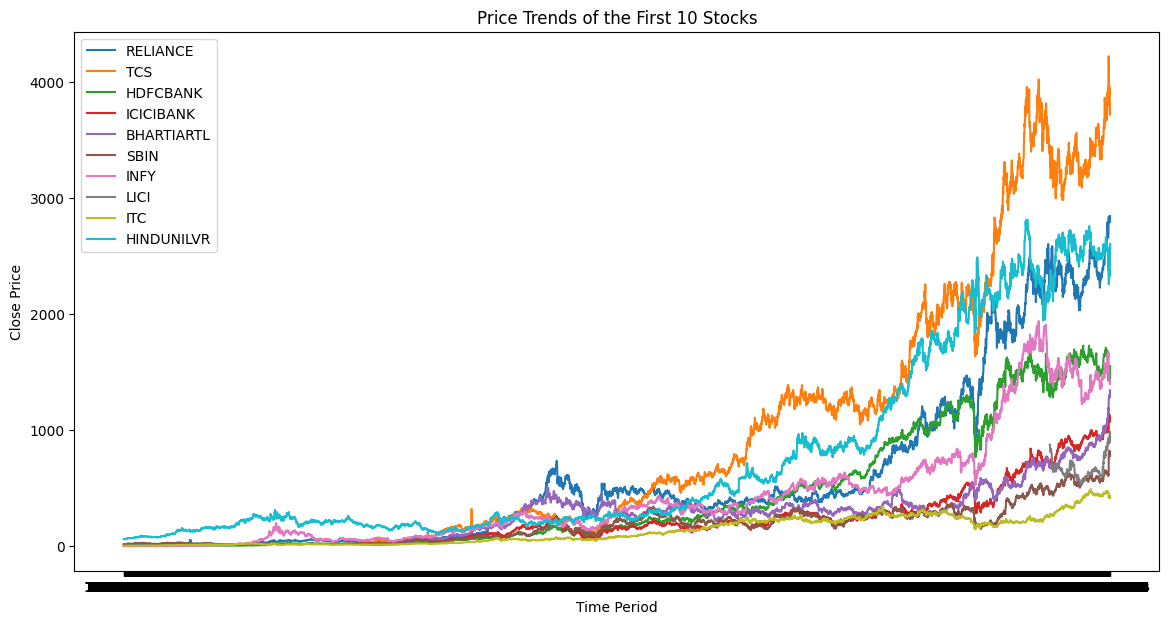

In [8]:
stocks = df.columns[1:11]  

plt.figure(figsize=(14, 7))
for stock in stocks:
    plt.plot(df['Date'], df[stock], label=stock)

plt.xlabel('Time Period')
plt.ylabel('Close Price')
plt.title('Price Trends of the First 10 Stocks')
plt.legend()
plt.show()

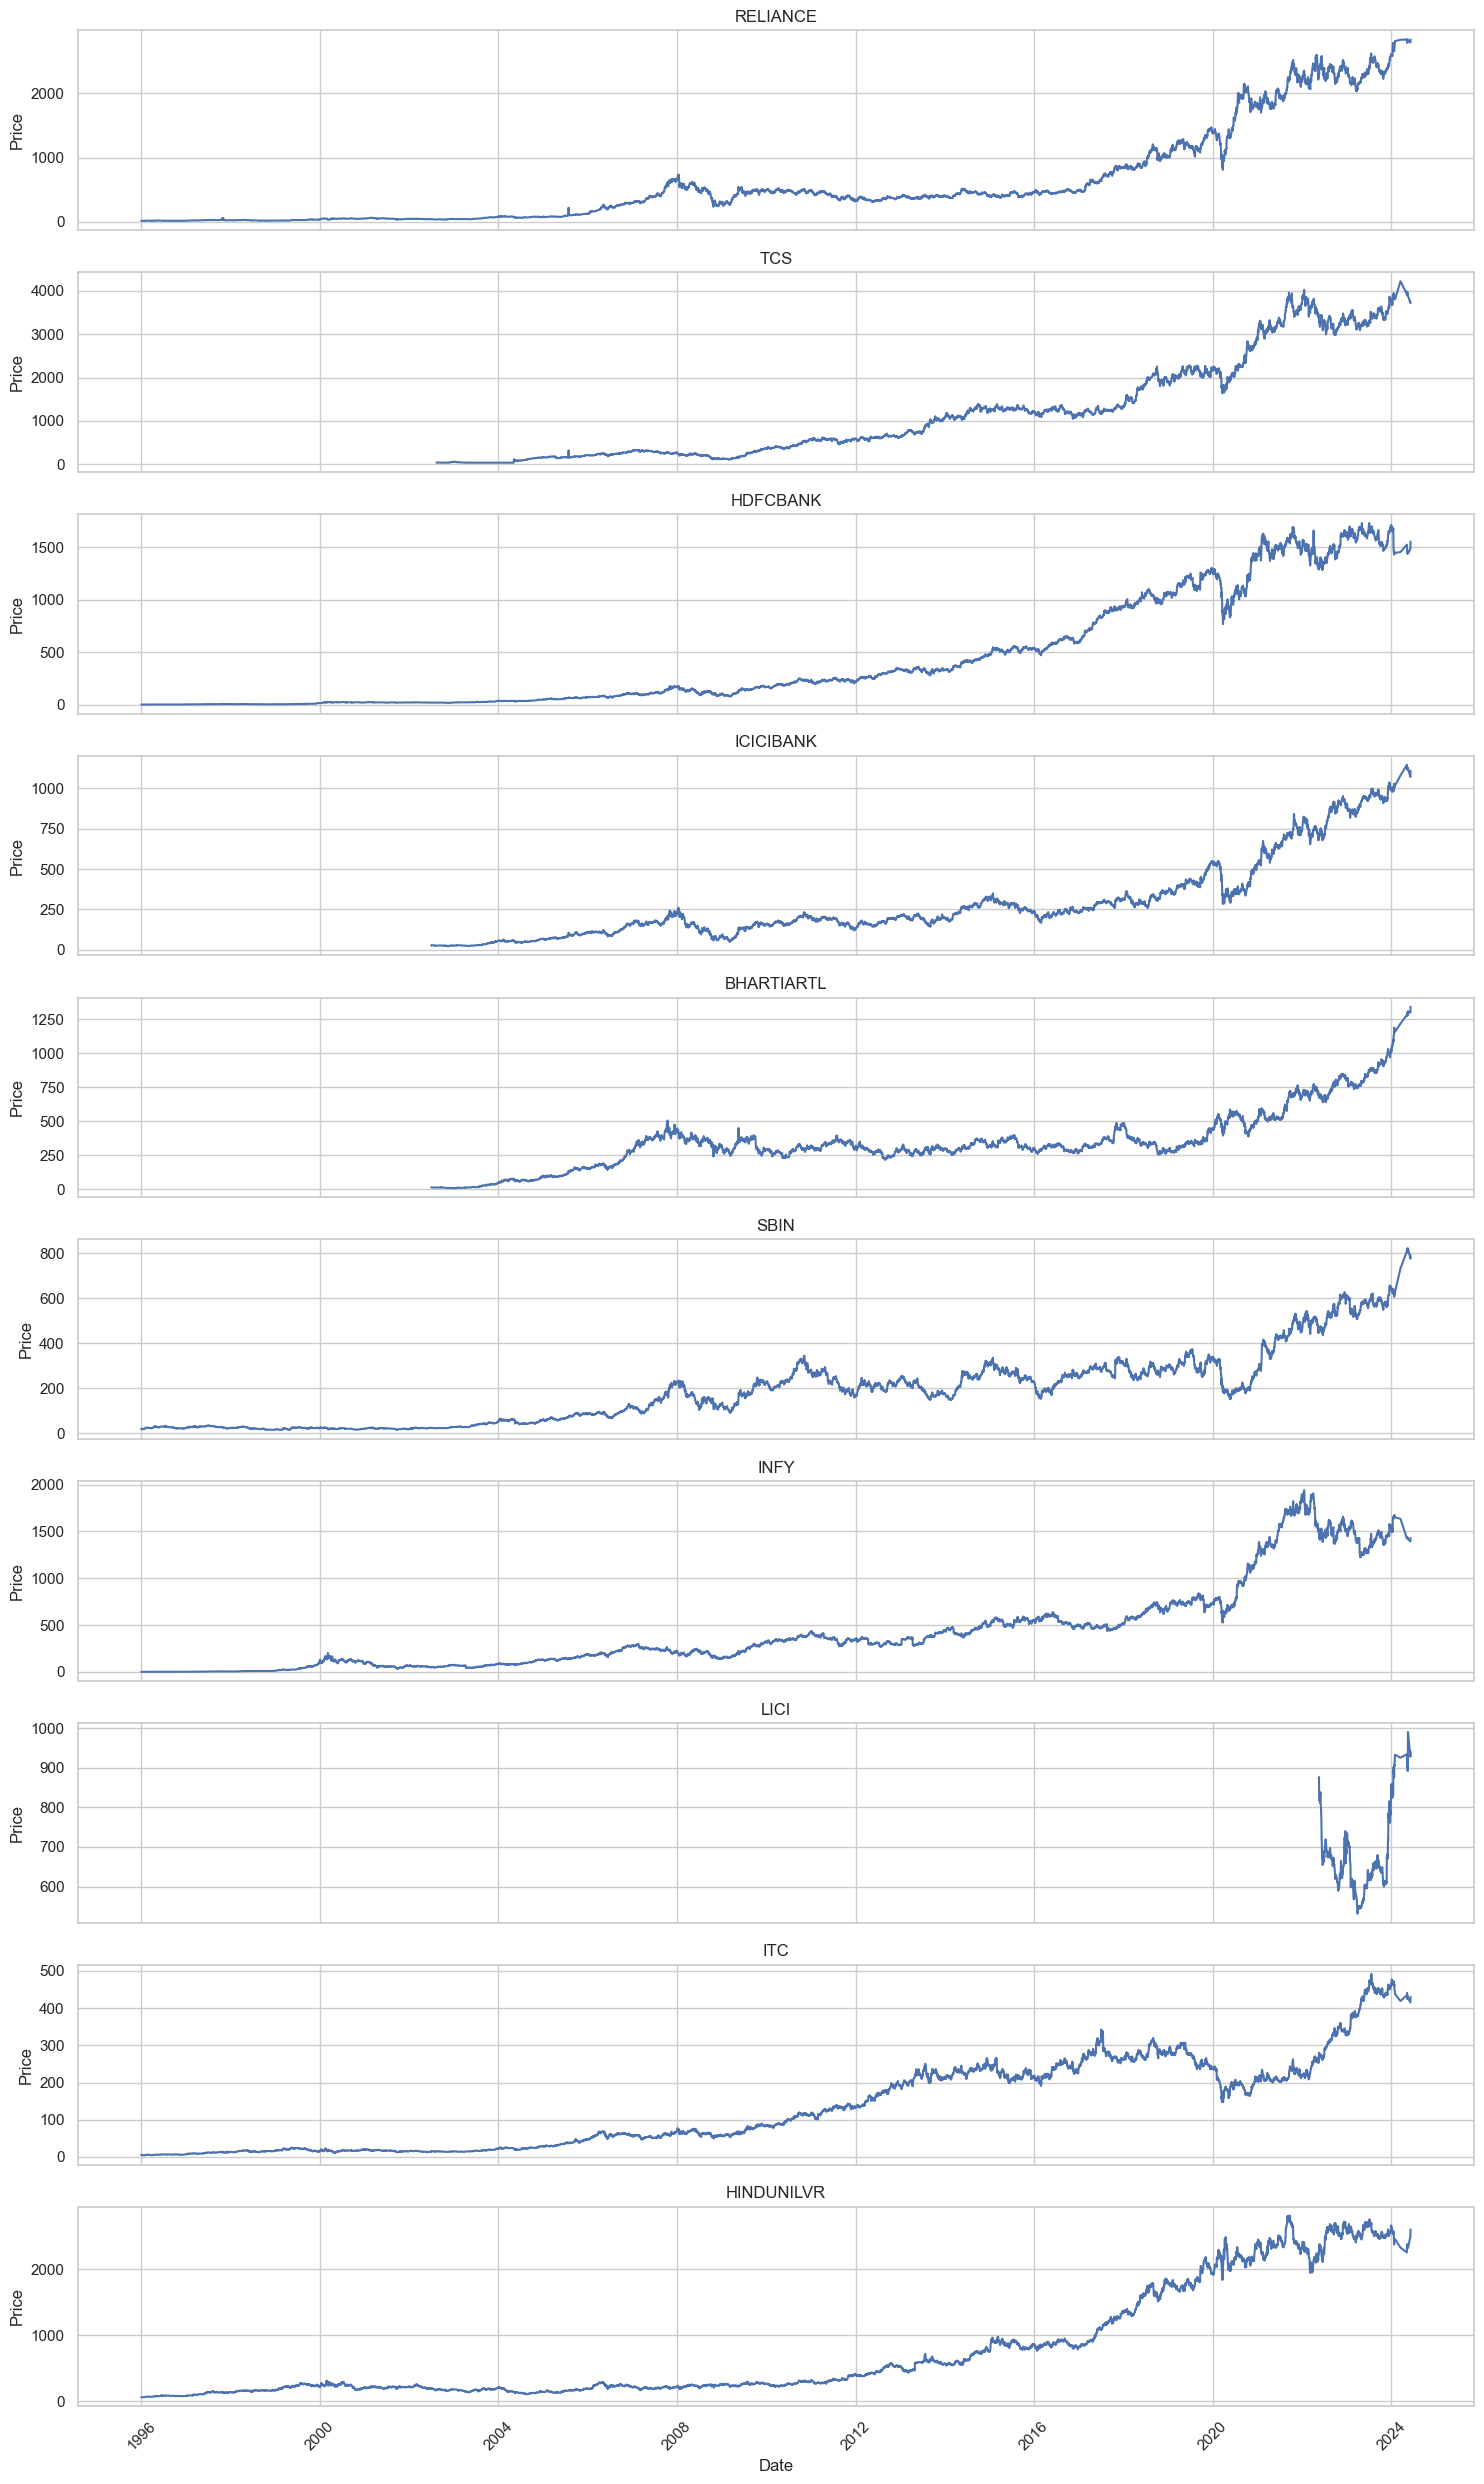

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

stocks = df.columns[1:11]

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=len(stocks), ncols=1, figsize=(15, 25), sharex=True)

for i, stock in enumerate(stocks):
    sns.lineplot(ax=axes[i], x='Date', y=stock, data=df)
    axes[i].set_title(stock)
    axes[i].set_ylabel('Price')
    
axes[-1].set_xlabel('Date')

for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()

plt.show()

# 2. Correlation Analysis

### 2.1 Pivot Data and Calculate Returns

<class 'pandas.core.frame.DataFrame'>
Index: 7072 entries, 1303 to 8448
Columns: 1418 entries, Date to PRITIKAUTO
dtypes: datetime64[ns](1), float64(1417)
memory usage: 76.6 MB
None
           Date   RELIANCE  TCS  HDFCBANK  ICICIBANK  BHARTIARTL       SBIN  \
1303 1996-01-01  14.691803  NaN     2.980        NaN         NaN  18.823240   
1304 1996-01-02  14.577553  NaN     2.975        NaN         NaN  18.224106   
1305 1996-01-03  14.688232  NaN     2.985        NaN         NaN  17.738192   
1306 1996-01-04  14.552561  NaN     2.965        NaN         NaN  17.676863   
1307 1996-01-05  14.452592  NaN     2.960        NaN         NaN  17.577793   

          INFY  LICI       ITC  ...  COOLCAPS  ALLETEC  20MICRONS  VIKASECO  \
1303  0.796679   NaN  5.583333  ...       NaN      NaN        NaN       NaN   
1304  0.793457   NaN  5.372222  ...       NaN      NaN        NaN       NaN   
1305  0.798828   NaN  5.200000  ...       NaN      NaN        NaN       NaN   
1306  0.793554   NaN  5.297

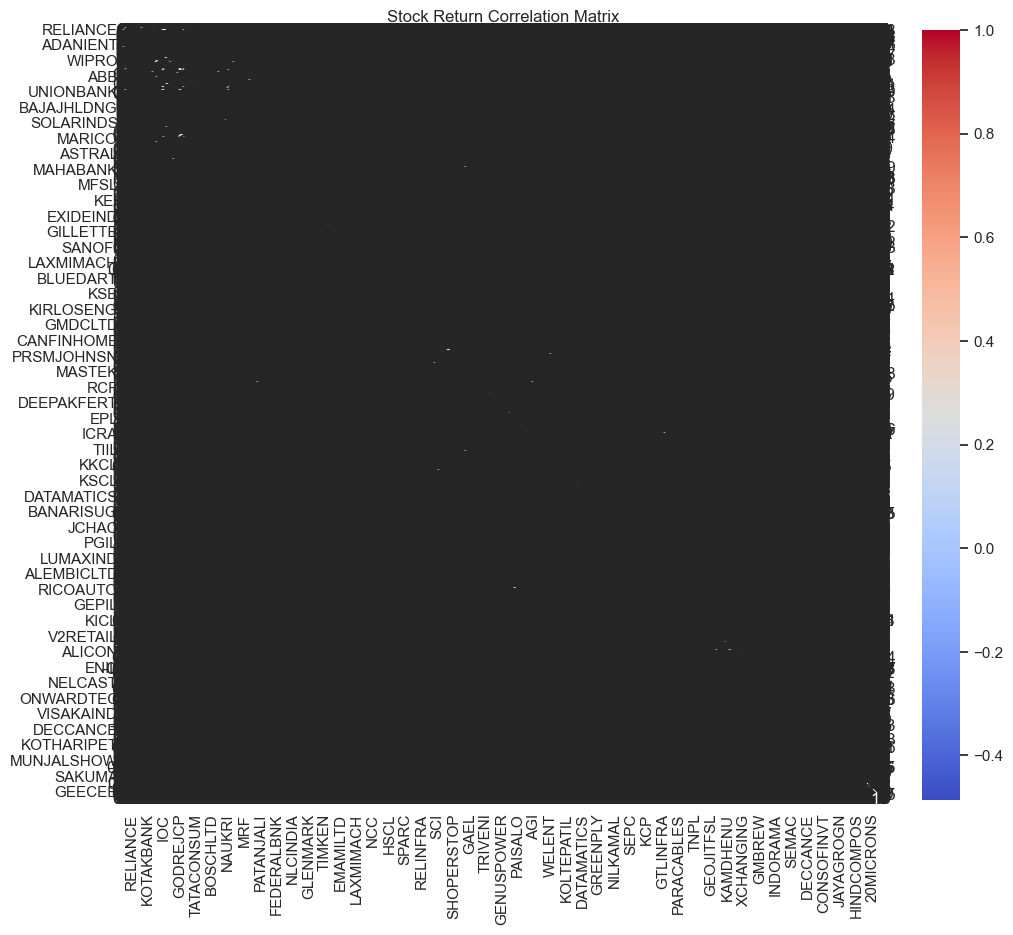

Most Correlated Pairs:
 Series([], dtype: float64)


In [10]:
# Step 1: Inspect the dataset
print(df.info())
print(df.head())

# Step 2: Select only numeric columns
numeric_data = df.select_dtypes(include=[np.number])

# Check the percentage of missing values in each column
missing_percentage = numeric_data.isna().mean() * 100
print("Missing values percentage in each column:\n", missing_percentage)

# Drop columns with more than a certain threshold of missing values
threshold = 50  # For example, 50% missing values
numeric_data = numeric_data.loc[:, missing_percentage < threshold]

# Forward fill remaining missing values
numeric_data = numeric_data.ffill()

# Check if numeric_data is empty after dropping columns
if numeric_data.empty:
    raise ValueError("No numeric columns found in the dataset after dropping columns with too many missing values.")

# Diagnostic: Print the first few rows of numeric_data
print("Numeric data after forward fill and dropping columns with too many missing values:")
print(numeric_data.head())

# Step 3: Calculate daily returns
returns = numeric_data.pct_change().dropna()

# Diagnostic: Print the first few rows of returns
print("Returns after pct_change:")
print(returns.head())

# Check if returns is empty after calculating pct_change
if returns.empty:
    raise ValueError("No valid returns calculated. Check the data.")

# Step 4: Drop columns with all NaN values after pct_change
returns = returns.dropna(axis=1, how='all')

# Check if returns is empty after dropping columns with all NaN values
if returns.empty:
    raise ValueError("All columns contain NaN values after calculating returns.")

# Step 5: Compute the correlation matrix
correlation_matrix = returns.corr()

# Check if correlation_matrix is empty
if correlation_matrix.empty:
    raise ValueError("Correlation matrix is empty. Check the returns data.")

# Print the correlation matrix
print("Correlation matrix:\n", correlation_matrix)

# Step 6: Find the most correlated pairs of stocks
corr_pairs = correlation_matrix.unstack().sort_values(kind="quicksort")
most_correlated = corr_pairs[(corr_pairs < 1) & (corr_pairs == corr_pairs.max())]
most_correlated_pairs = most_correlated.index.tolist()

# Step 7: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Stock Return Correlation Matrix')
plt.show()

# Output the most correlated pairs
print("Most Correlated Pairs:\n", most_correlated)


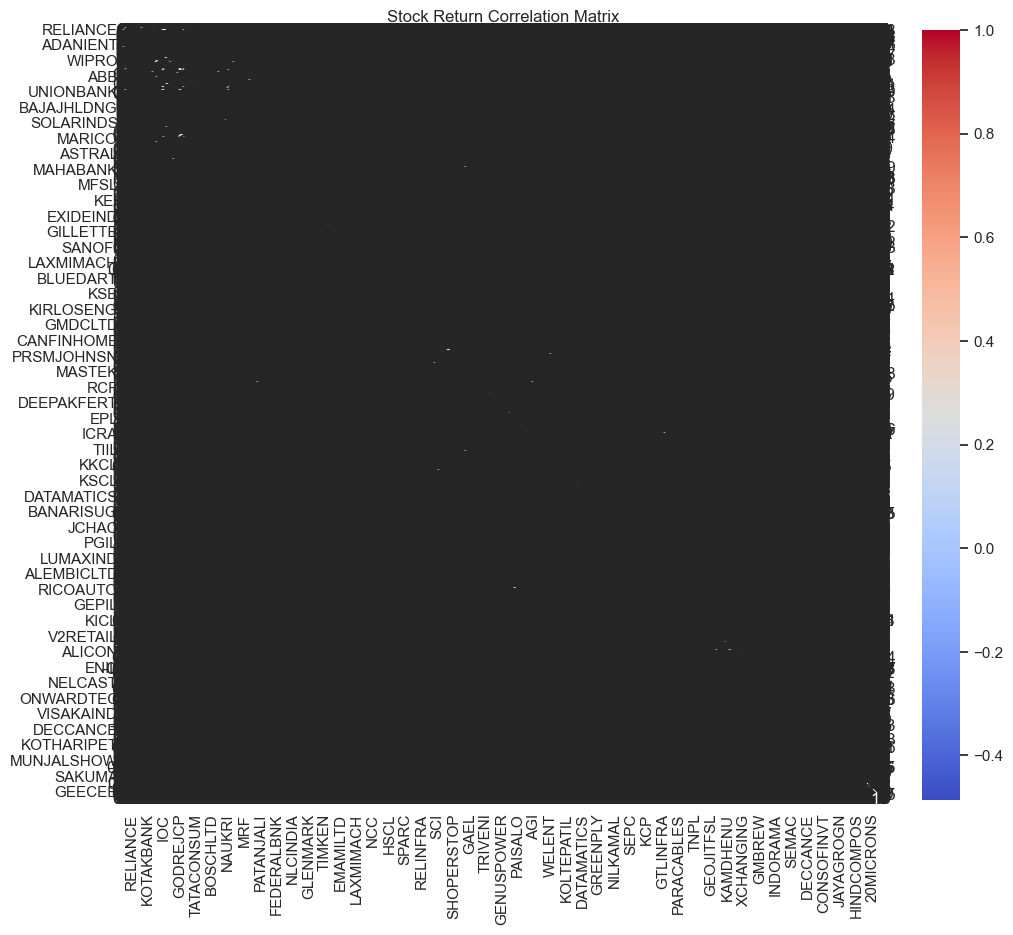

Most Correlated Pairs:
 Series([], dtype: float64)


In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Stock Return Correlation Matrix')
plt.show()

# Output the most correlated pairs
print("Most Correlated Pairs:\n", most_correlated)

# 3. Time Series Decomposition

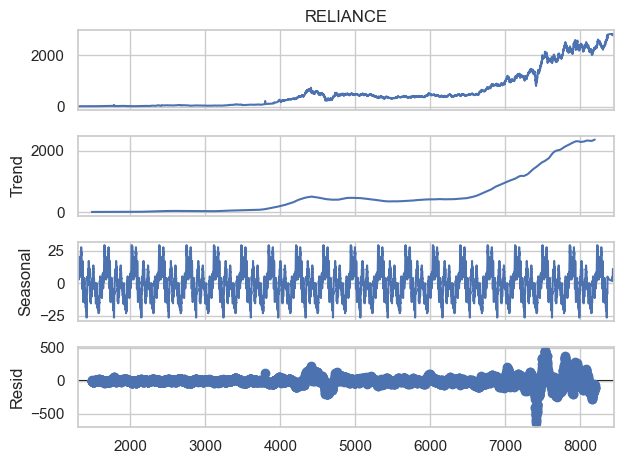

In [12]:
result = seasonal_decompose(df['RELIANCE'], model='additive', period=365)

# Plot the decomposition
result.plot()
plt.show()

# 4. Anomaly Detection

In [13]:
iso_forest = IsolationForest(contamination=0.01)  # 1% of data is considered anomalies
df['anomaly'] = iso_forest.fit_predict(df[['RELIANCE']])

# Anomalies are marked as -1
anomalies = df[df['anomaly'] == -1]

# Sort anomalies by the magnitude of price movement
anomalies['price_movement'] = df['RELIANCE'].pct_change().abs()
top_anomalies = anomalies.sort_values(by='price_movement', ascending=False).head(5)
print(top_anomalies)

           Date     RELIANCE          TCS     HDFCBANK    ICICIBANK  \
8364 2024-01-30  2815.250000  3800.550049  1444.300049  1016.900024   
8227 2023-07-10  2524.450195  3271.949951  1656.449951   948.400024   
8236 2023-07-21  2538.750000  3368.300049  1675.750000   997.000000   
7928 2022-04-26  2561.924072  3546.300049  1372.050049   753.750000   
8360 2024-01-23  2657.149902  3858.250000  1427.349976  1029.050049   

       BHARTIARTL        SBIN         INFY        LICI         ITC  ...  \
8364  1158.650024  626.750000  1651.449951  932.900024  438.049988  ...   
8227   885.400024  592.599976  1329.150024  618.549988  465.850006  ...   
8236   886.000000  615.099976  1331.599976  635.750000  490.450012  ...   
7928   756.299988  505.500000  1581.000000         NaN  258.950012  ...   
8360  1158.000000  605.099976  1642.150024  875.250000  459.299988  ...   

       20MICRONS  VIKASECO  ORIENTBELL      DONEAR     CAREERP   INTLCONV  \
8364  169.949997      4.60  373.850006  107.1

C:\Users\yashk\AppData\Local\Temp\ipykernel_20720\381539781.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalies['price_movement'] = df['RELIANCE'].pct_change().abs()
